In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


SegNet Training Curve
===

In [2]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import spline
import seaborn as sns

In [3]:
matplotlib.rcParams.update({'font.size': 16})

In [239]:
def plot_train_curve(ax, key, train_dir, is_val=True):
    log = pd.read_json(os.path.join(train_dir, 'log'))
    
    if is_val:
        log = log[log['validation/main/miou'].notnull()]
        print(log['validation/main/miou'].max())

        ax.plot(log['iteration'],
                log['validation/main/miou'] * 100,
                marker='^',
                label=key)
        ax.set_ylabel('Validation mIoU (%)')

    else:
        ax.plot(log['iteration'], log['main/loss'], label=key)
        ax.set_ylabel('Train Loss')


0.6038032899483521
0.6021472991225271


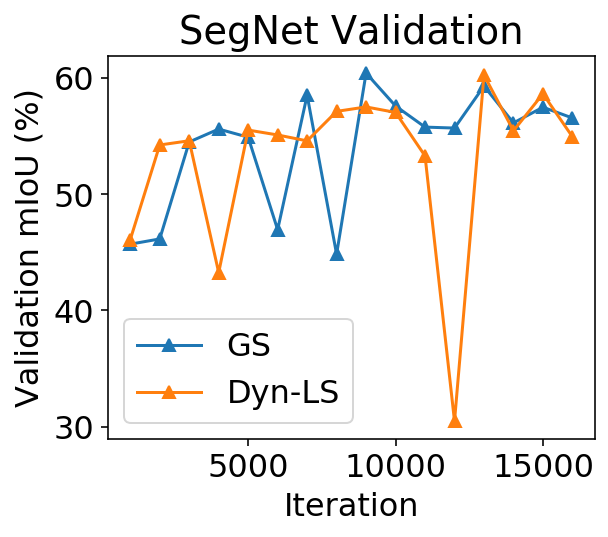

In [246]:
fig, ax = plt.subplots(figsize=(4.5, 4))

DIRS = {
    'GS': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/segmentation/segnet/ada_loss.F_100_AB_65504_SB_65504_UF_1e-3.20200120_2/',
    'Dyn-LS': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/segmentation/segnet/dyn_loss.intv_10.20200120_2'
}

for key, train_dir in DIRS.items():
    plot_train_curve(ax, key, train_dir, is_val=True)
    
ax.legend()
ax.set_xlabel('Iteration')
ax.set_title('SegNet Validation')

fig.tight_layout()
fig.savefig('SegNet_Train_Curve.pdf')

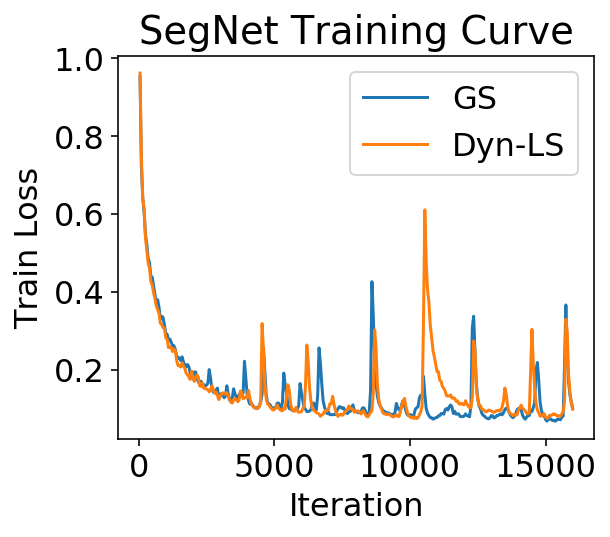

In [242]:
fig, ax = plt.subplots(figsize=(4.5, 4))

DIRS = {
    'GS': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/segmentation/segnet/ada_loss.F_100_AB_65504_SB_65504_UF_1e-3.20200120_2/',
    'Dyn-LS': '/mnt/ccnas2/bdp/rz3515/train/ada_loss/segmentation/segnet/dyn_loss.intv_10.20200120_2'
}

for key, train_dir in DIRS.items():
    plot_train_curve(ax, key, train_dir, is_val=False)
    
ax.legend()
ax.set_xlabel('Iteration')
ax.set_title('SegNet Training Curve')

fig.tight_layout()
fig.savefig('SegNet_Train_Curve_Loss.pdf')